# Single Layer LSTM

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.3.0


# 1 Data

## Get the Data

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOITNW6/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOITNW6/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOITNW6/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


## Preprocess

In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# shuffle
train_dataset = train_dataset.shuffle(BUFFER_SIZE)

# pad
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

# 2 Model

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 59s 152ms/step - loss: 0.5272 - accuracy: 0.7292 - val_loss: 0.4227 - val_accuracy: 0.8204
Epoch 2/10
391/391 [==============================] - 59s 152ms/step - loss: 0.3450 - accuracy: 0.8620 - val_loss: 0.3947 - val_accuracy: 0.8374
Epoch 3/10
391/391 [==============================] - 60s 154ms/step - loss: 0.2568 - accuracy: 0.9027 - val_loss: 0.3787 - val_accuracy: 0.8482
Epoch 4/10
391/391 [==============================] - 60s 153ms/step - loss: 0.2335 - accuracy: 0.9147 - val_loss: 0.4210 - val_accuracy: 0.8268
Epoch 5/10
391/391 [==============================] - 60s 153ms/step - loss: 0.2125 - accuracy: 0.9209 - val_loss: 0.4373 - val_accuracy: 0.8302
Epoch 6/10
391/391 [==============================] - 60s 155ms/step - loss: 0.1873 - accuracy: 0.9314 - val_loss: 0.4594 - val_accuracy: 0.8344
Epoch 7/10
391/391 [==============================] - 60s 152ms/step - loss: 0.1593 - accuracy: 0.9433 - val_loss: 0.5392 - val_ac

# 3 Plot Loss and Accuracy

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

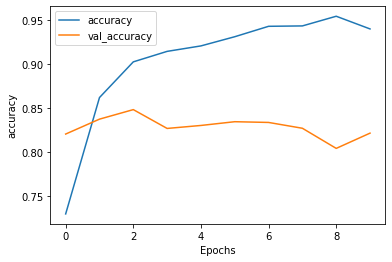

In [10]:
plot_graphs(history, 'accuracy')

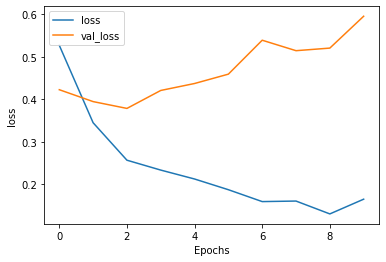

In [11]:
plot_graphs(history, 'loss')